In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
import json
import os
import sys
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np
sys.path.insert(0, os.path.abspath('./src/'))
import torch
%matplotlib inline
from DataLoader import ImagesetDataset
from utils import getImageSetDirectories, imsetshow

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [5]:
dev = torch.device('cuda') if torch.cuda.is_available() else 'cpu'
print(f'Using {dev}')

Using cuda


---

In [6]:
train_set_directories = getImageSetDirectories("data/train")

config = json.load(open('config/config.json'))
config['training']['create_patches'] = False

train_dataset = ImagesetDataset(imset_dir=train_set_directories, config=config['training'], top_k=0)

In [7]:
imset = train_dataset['imgset0205']
print(imset)

      name : imgset0205
      name : str (imgset0205)
        lr : torch.Size([29, 128, 128]) Tensor (torch.float32)
        hr : torch.Size([384, 384]) Tensor (torch.float32)
    hr_map : torch.Size([384, 384]) Tensor (torch.float32)
clearances : (29,) ndarray (uint64)


The task for this dataset is to obtain high resolution images from low resolution images. High resolution images are costly to store or transmit, therefore such problem is well investigated in the literature. 

The approach of this method is explained in the following paper: [Super-Resolution of PROBA-V Images UsingConvolutional Neural Networks](https://arxiv.org/pdf/1907.01821.pdf)

This paper is a very recent improvement in the field of super-resolution, hence might be very useful for this task: [Image Super-Resolution via Attention based Back Projection Networks](https://arxiv.org/pdf/1910.04476.pdf)


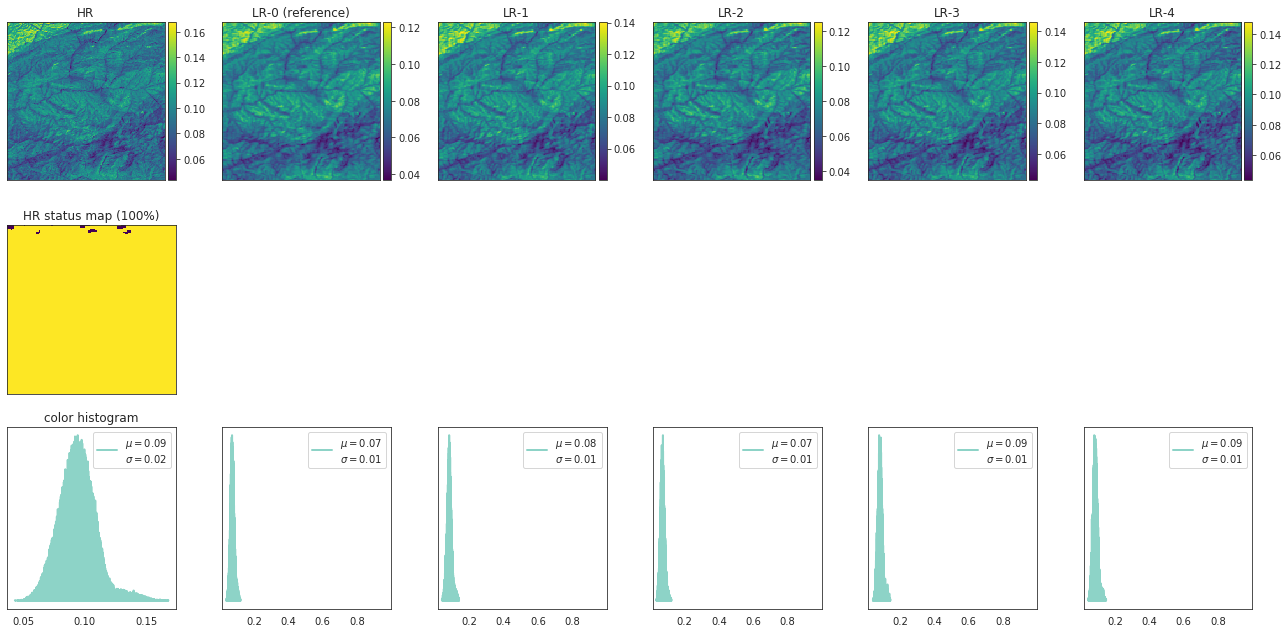

In [8]:
imsetshow(imset, k=5)